# Równowagi cz.1



### Przykład 1

Obliczyć skład równowagowy mieszaniny reakcyjnej zawierającej początkowo kwas octowy o stężeniu 3mol/L (K) i etanol o stężeniu 16 mol/L (A) oraz katalityczną ilość $H_2SO_4$ wiedząc, że stała równowagi w warunkach eksperymentu K=4.9.


$$ROH + R'COOH \rightleftharpoons R'COOR + H_2O$$

http://pubs.acs.org/doi/pdf/10.1021/ed067p796

In [158]:
from scipy.optimize import fsolve


def model(X):
    a, k, e, w = X
    K = 4.9
    c_k = 3
    c_a = 16

    #eq1 = (e*w)/(a*k)-K
    eq1 = (e*w)-K*(a*k)            #definicja stałej równowagi w postaci przekształconej do iloczynu
    eq2 = a + e - c_a               #bilans alkoholu i jego form
    eq3 = k + e - c_k               #bilans kwasu i jego form
    eq4 = e - w                     #zależność: liczba wiązań estrowych, a ilość wody
    return [eq1, eq2, eq3, eq4]


a = 1
k = 1
e = 1
w = 1
guess = [a, k, e, w]

a, k, e, w = fsolve(model, guess)

print("Stężenia równowagowe: [EtOH]={0:.2f}mol/L [CH3COOH]={1:.2f}mol/L [CH3COOEt]={2:.2f}mol/L [H2O]={3:.2f}mol/L".format(a, k, e, w))

Stężenia równowagowe: [EtOH]=13.13mol/L [CH3COOH]=0.13mol/L [CH3COOEt]=2.87mol/L [H2O]=2.87mol/L


### Zadanie 1

Obliczyć skład równowagowy mieszaniny reakcyjnej zawierającej początkowo kwasu octowy o stężeniu 3mol/L (K) i mieszaninę etanolu (E) i propanolu (P) o stężeniu odpowiednio 8 mol/L i 7 mol/L oraz katalityczną ilość $H_2SO_4$ wiedząc, że stała równowagi  tworzenia octanu etylu w warunkach eksperymentu Koe=4.9, natomiast octanu propylu Kop=4.2.


$$R'OH + RCOOH \rightleftharpoons RCOOR' + H_2O$$
$$R''OH + RCOOH \rightleftharpoons RCOOR'' + H_2O$$


Sprawdzić poprawność otrzymanych wyników.

Odp.: [EtOH]=6.39 [PrOH]=5.76 [CH3COOEt]=1.61 [CH3COOPr]=1.24 [H2O]=2.85 [CH3COOH]=0.15

### Przykład 2

W zbiorniku w temperaturze 723K zmieszano 8.1 mol H2 oraz 2.94 mol I2. Obliczyć skład równowagowy mieszaniny, wiedząc, wartość ułamkowej stałej równowagi w tych warunkach wynosi K=50.403.

W celu sprawdzenia wyników, wykonać bilans pierwiastkowy.

In [152]:
from scipy.optimize import fsolve


def model(X):
    h2, i2, hi = X
    K = 50.403
    n0_h2 = 8.1
    n0_i2 = 2.94

    eq1 = hi**2 - K*(h2*i2)    #forma iloczynu
    eq2 = h2 + 0.5*hi - n0_h2
    eq3 = i2 + 0.5*hi - n0_i2
    return [eq1, eq2, eq3]


h2 = 1
i2 = 1
hi = 1
guess = [h2, i2, hi]

h2, i2, hi = fsolve(model, guess)

print("[H2]={0:.3f} [I2]={1:.3f} [HI]={2:.3f}".format(h2, i2, hi))

[H2]=5.280 [I2]=0.120 [HI]=5.641


### Przykład 3

Przeanalizować zależność stężenia równowagowego octanu etylu od stężenia początkowego kwasu octowego w zakresie 0.1 - 3 mol/L (wykres). Kiedy uzyska się ester najmniej zanieczyszczony kwasem octowym?

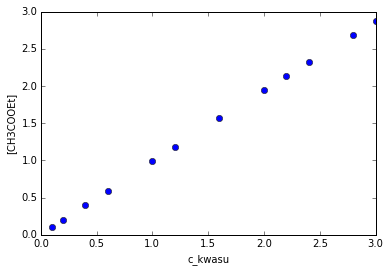

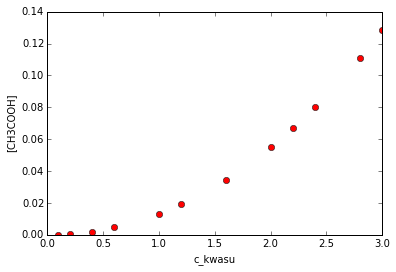

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.optimize import fsolve

def model(X, c_kwasu):   #<<<---- uwaga 2 argumenty w modelu
    a, k, e, w = X
    K = 4.9
    c_k = c_kwasu
    c_a = 16

    #eq1 = (e*w)/(a*k)-K
    eq1 = (e*w)-K*(a*k)            #definicja stałej równowagi w postaci przekształconej do iloczynu
    eq2 = a + e - c_a
    eq3 = k + e - c_k
    eq4 = e - w
    return [eq1, eq2, eq3, eq4]


a = 1
k = 1
e = 1
w = 1
guess = [a, k, e, w]

#
wynik_c_kwasu=[]
wynik_a=[]
wynik_k=[]
wynik_e=[]
wynik_w=[]

for c_kwasu in [0.1, 0.2, 0.4, 0.6, 1, 1.2, 1.6, 2, 2.2, 2.4, 2.8, 3]:
    a, k, e, w = fsolve(model, guess, c_kwasu) #<<<-- uwaga 3 argumenty w fsolve
    wynik_c_kwasu.append(c_kwasu)
    wynik_a.append(a)
    wynik_k.append(k)
    wynik_e.append(e)
    wynik_w.append(w)
    
plt.plot(wynik_c_kwasu, wynik_e, 'bo')
plt.xlabel("c_kwasu")
plt.ylabel("[CH3COOEt]")
plt.show()

plt.plot(wynik_c_kwasu, wynik_k, 'ro')
plt.xlabel("c_kwasu")
plt.ylabel("[CH3COOH]")
plt.show()

### Przykład 4

Obliczyć pH roztworu mocnego kwasu (np. HCl) o stężeniu:

a) 0.1 mol/L
b) 1e-7 mol/L

In [154]:
from scipy.optimize import fsolve
from numpy import log10

c = 0.1

def model(X):
    Kw = 1e-14
    c_HCL = c
    h, oh, cl = X
    eq1 = h*oh-Kw            # iloczyn jonowy wody
    eq2 = h-cl-oh            # bilans ładunku = warunek elektroobojętności roztworu
    eq3 = c_HCL - cl         # bilans masowy jonów chlorkowych
    return [eq1, eq2, eq3]

h=1e-5
oh=1e-5
cl=1e-8
guess = [h,oh,cl]

h,oh,cl = fsolve(model, guess)
print("Dla c HCl = {3:.2e}    [H]={0:.2e} [OH]={1:.2e} [Cl]={2:.2e}".format(h, oh, cl, c))
pH = -log10(h)
print("pH={0:.2f}".format(pH))

Dla c HCl = 1.00e-01    [H]=1.00e-01 [OH]=1.00e-13 [Cl]=1.00e-01
pH=1.00


### Zadanie 2


Obliczyć pH wodnego roztworu kwasu akrylowego o stężeniu 1 oraz 0.1 mol/L. pKa = 4.25.


$$ RCOOH + H_2O \rightleftharpoons RCOO^- + H_3O^+$$

Odpowiedź: pH=2.13 (1M) 2.63 (0.1M)


### Przykład 5

Obliczyć pH 0.1M roztworu Tris. pKa=8.07

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Tris.png/160px-Tris.png"/>

$$ B + H_2O \rightleftharpoons BH^+ + OH^-, K_b$$

In [155]:
from scipy.optimize import fsolve
from numpy import log10


pKa = 8.07
pKb = 14 - pKa
Kb = 10**(-pKb)

def model(X):
    Kw = 1e-14
    c_zasada = 0.1
    b, bh, h, oh = X
    eq1 = h*oh-Kw               # iloczyn jonowy wody
    eq2 = bh + h - oh            # bilans ładunku = warunek elektroobojętności roztworu
    eq3 = b + bh - c_zasada       # bilans zasady (jej form)
    eq4 = bh*oh - Kb*b
    return [eq1, eq2, eq3, eq4]



# pozmieniać, sprawdzić wpływ guess
ha = 1e-2
a = 1e-2
h = 1e-2
oh = 1e-2

guess = [ha, a, h, oh]

ha, a, h, oh = fsolve(model, guess)
pH = -log10(h)
print("pH={0:.2f}".format(pH))

pH=10.53
